In [1]:
import matplotlib.pyplot as plt
import numpy as np

from plotclass import compute_p_values
from plotclass import BarChartWithStats 

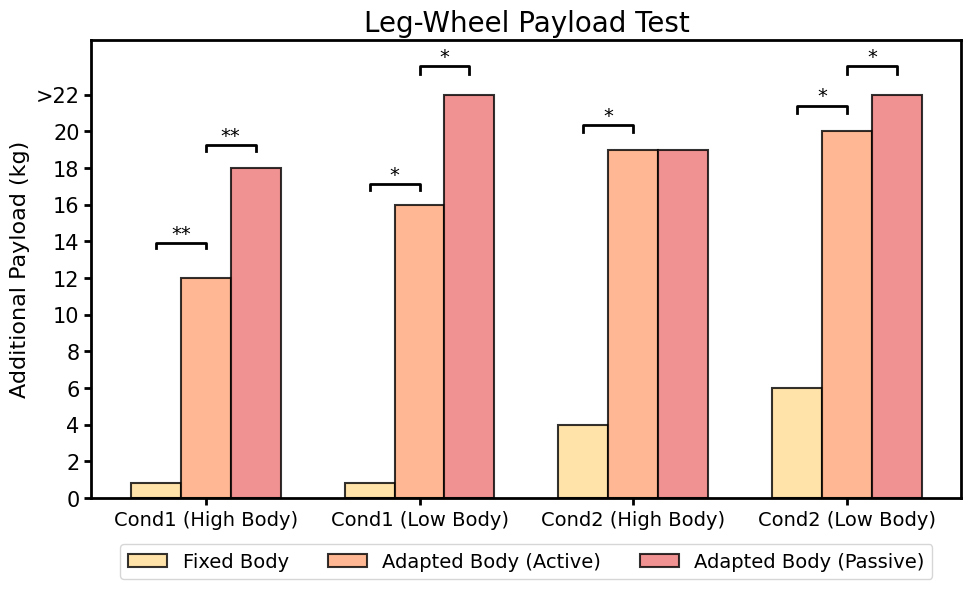

In [19]:
global_params = {
    'bar_group_spacing': 0.7,
    'color_list': None,
    'title_fontsize': 20,
    'label_fontsize': 16,
    'ticklabel_fontsize': 14,
    'legend_fontsize': 14,
    'annotation_fontsize': 14,
    'spine_width': 2,
    'tick_width': 2,
    'errorbar_linewidth': 2,
    'bar_edge_width': 1.5,
    'alpha': 0.8,
    'ylim': None
}

fig, ax = plt.subplots(figsize=(10, 6))

# Explicit group indices
minval = 0.8
data_example = [
    [  # Fixed
        (0, [minval,minval,minval,minval]),
        (1, [minval,minval,minval,minval]),
        (2, [4,4,4,4]),
        (3, [6,6,6,6])
    ],
    [  # Active Adapt
        (0, [11,11,11,11,13,13,13,13]),
        (1, [16,16,16,16]),
        (2, [19,19,19,19]),
        (3, [20,20,20,20])
    ],
    [  # Passive Adapt
        (0, [18,18,18,18]), 
        (1,[22,22,22,22]),
        (2, [19,19,19,19]),
        (3, [22,22,22,22])
    ]
]

group_labels = {0: 'Cond1 (High Body)', 1: 'Cond1 (Low Body)', 2: 'Cond2 (High Body)', 3: 'Cond2 (Low Body)'}
condition_labels = ['Fixed Body', 'Adapted Body (Active)', 'Adapted Body (Passive)']
comparisons = [(0,i,1,i) for i in range(4)]+[(1,i,2,i) for i in range(4)]
p_values = compute_p_values(data_example,comparisons)

params = global_params.copy()
params['title'] = 'Leg-Wheel Payload Test'
params['color_list'] = ['#FFDD94', '#FFA778','#EE7777']

chart = BarChartWithStats(ax, **params)
chart.plot(data_example, group_labels, condition_labels, comparisons=comparisons, p_values=p_values, 
           ebar = False, ylabel='Payload (kg)',legendloc='upper center',legendncol=3, 
           legendoffset =(0.5, -0.08), comparisonoffset = 0)

ax.set_ylim([0,25])
ax.set_yticks(np.arange(0,22.1,2))
yticklabs = np.arange(0,22.1,2).astype(int).astype(str)
yticklabs[-1] = '>22'
ax.set_yticklabels(yticklabs,fontsize=15)

plt.tight_layout()
plt.show()